In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook

$ S_{w,b}(x) = \frac{1}{1+e^-(w*x+b)} $

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(1,3,-2)

0.7310585786300049

In [4]:
w=-0.9 
b=3
x = np.linspace(-10,10,100)
y = sigmoid(x,w,b)

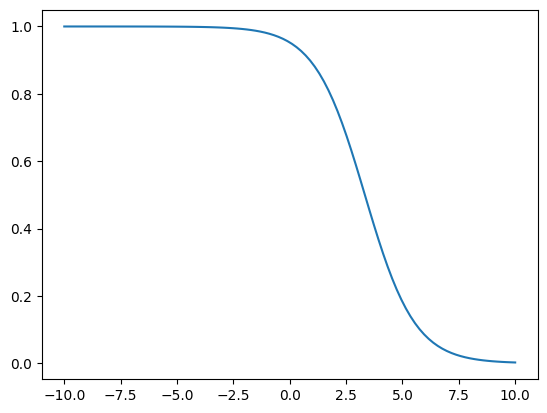

In [5]:
plt.plot(x,y) 
plt.show()

$ S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^-(w_1*x_1 + w_2*x_2 + b)} $

In [6]:
from mpl_toolkits import mplot3d

In [7]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1 / (1+np.exp(-(w1*x1 + w2*x2 +b)))

In [8]:
sigmoid_2d(1,0,3,0,-2)

0.7310585786300049

In [9]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1,XX2 = np.meshgrid(X1,X2)

In [10]:
w1=0.5
w2=0.5
b=0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

Text(0.5, 0, 'y')

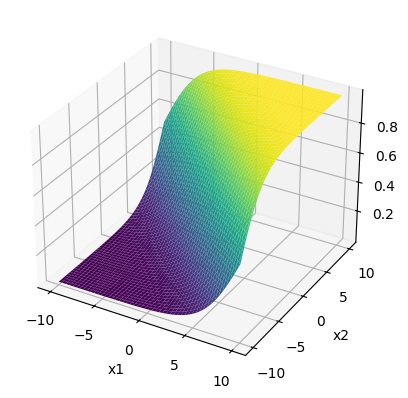

In [11]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(XX1,XX2,Y,cmap="viridis")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
# ax.view_init(30,200)

In [12]:
X = np.random.randint(-10,10,size=100)
Y = np.random.randint(-10,10,size=100)

In [13]:
def calculate_loss(X,Y,w,b):
    loss =0
    for x,y in zip(X,Y):
        loss += (y-sigmoid(x,w,b))**2
    return loss

In [14]:
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)
WW,BB = np.meshgrid(W,B)

In [15]:
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])


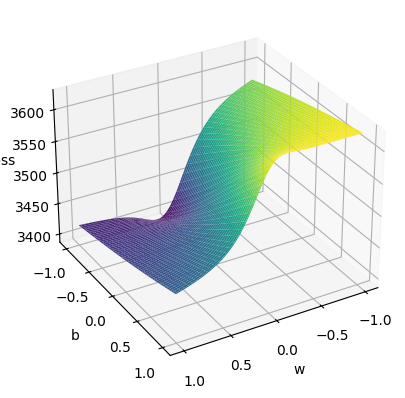

In [16]:
## Plotting loss with respect to W,B
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(WW,BB,Loss,cmap="viridis")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30,60)

In [17]:
ij =np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j =int(ij - i*Loss.shape[1])

In [18]:
print(WW[i,j],BB[i,j])

0.11111111111111116 -1.0


# Class For Sigmoid Neuron

In [19]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-(np.dot(x,self.w.T) + self.b)))

    def grad_w(self,x,y):
        y_pred = self.sigmoid(x)
        return (y_pred-y)*y_pred*(1-y_pred)*x

    def grad_b(self,x,y):
        y_pred = self.sigmoid(x)
        return (y_pred-y)*y_pred*(1-y_pred)
    def predict(self,X):
        y_pred =[]
        for x in X:
            result = self.sigmoid(x)
            y_pred.append(result)
        return np.array(y_pred)
            
    def fit(self,X,Y,epochs=1000,learning_rate=0.01,display_loss=False):
        self.w = np.zeros(X.shape[1])
        self.b=0
        if display_loss :
            loss ={}
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw,db =0,0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -=learning_rate*dw
            self.b -=learning_rate*db
            if display_loss:
                Y_pred = self.sigmoid(X)
                loss[i] = mean_squared_error(Y_pred,Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()
            
            

        

In [20]:
X = np.asarray([[2.5,2.5],[4,-1],[-1,4],[3,1.25],[2,4],[1,5]])
Y = [1,0,1,0,1,0]

In [21]:
sig = SigmoidNeuron()


C:\Users\SANTOSH\AppData\Local\Temp\ipykernel_19704\562620648.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

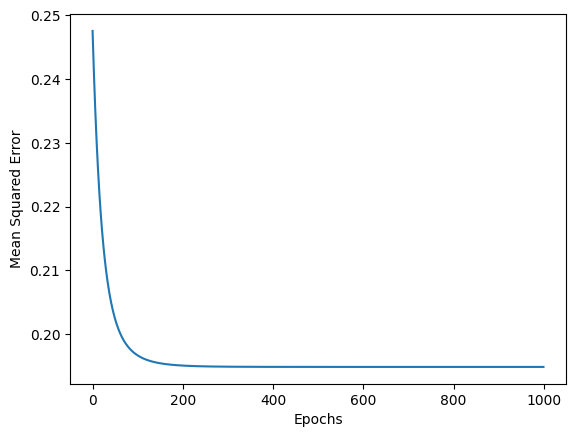

In [22]:
sig.fit(X,Y,display_loss=True)

In [23]:
print(sig.w)

[-0.32862728  0.3062078 ]


# Load Data

In [24]:
data = pd.read_csv('mobile.csv')

In [25]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [26]:
data.dtypes


PhoneId                          int64
Pixel Density                    int64
Screen Size                    float64
Weight                           int64
RAM                              int64
                                ...   
SIM Slot(s)_Single SIM, GSM      int64
Sim1_2G                          int64
Sim1_3G                          int64
Sim1_4G                          int64
Rating                         float64
Length: 88, dtype: object

In [27]:
data.shape

(341, 88)

In [28]:
X = data.drop('Rating',axis=1)

In [29]:
Y = data['Rating'].values

In [30]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

#### Binarising the rating feature

In [31]:
threshold = 4.1
data['Class']= (data['Rating']>threshold).astype(int)

In [32]:
data

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,465,220,5.00,141,1,1.2,67.20,142.7,16,2420,...,0,0,1,0,0,0,0,1,3.8,0
337,466,401,5.50,165,4,1.8,69.95,156.5,64,3000,...,0,0,1,0,0,0,0,1,3.9,0
338,468,282,5.20,160,3,1.4,68.52,149.7,16,3000,...,0,0,1,0,0,0,0,1,4.1,0
339,470,218,4.50,156,1,1.3,63.93,132.0,8,1800,...,0,0,1,0,0,0,0,1,3.6,0


In [33]:
data['Class'].value_counts(normalize=True)

Class
0    0.533724
1    0.466276
Name: proportion, dtype: float64

In [34]:
Y_binarised = data['Class'].values

In [35]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Applying Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,stratify=Y_binarised,test_size=0.2)

# Standarisation 

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_standarised_train = scaler.fit_transform(X_train)
X_standarised_test = scaler.transform(X_test)

In [41]:
minmax_scaler = MinMaxScaler() # converts within a range 0,1

In [42]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1)) 
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [43]:
Y_scaled_train

array([[0.64],
       [0.72],
       [0.84],
       [0.56],
       [0.6 ],
       [0.72],
       [0.76],
       [0.84],
       [0.68],
       [0.68],
       [0.64],
       [0.72],
       [0.64],
       [0.6 ],
       [0.72],
       [0.6 ],
       [0.64],
       [0.64],
       [0.64],
       [0.64],
       [0.68],
       [0.84],
       [0.84],
       [0.6 ],
       [0.76],
       [0.68],
       [0.68],
       [0.68],
       [0.84],
       [0.72],
       [0.76],
       [0.8 ],
       [0.72],
       [0.64],
       [0.56],
       [0.76],
       [0.76],
       [0.6 ],
       [0.52],
       [0.68],
       [0.8 ],
       [0.72],
       [0.64],
       [0.36],
       [0.56],
       [0.76],
       [0.6 ],
       [0.48],
       [0.76],
       [0.6 ],
       [0.56],
       [0.48],
       [0.52],
       [0.24],
       [0.32],
       [0.76],
       [0.76],
       [0.56],
       [0.72],
       [0.6 ],
       [0.8 ],
       [0.76],
       [0.64],
       [0.12],
       [0.52],
       [0.72],
       [0.

In [44]:
## binarising the scaled Y_train and Y_test

scaled_threshold = minmax_scaler.transform(np.array([threshold]).reshape(1,-1))

In [45]:
scaled_threshold

array([[0.64]])

In [46]:
scaled_threshold = list(scaled_threshold)[0]

In [47]:
scaled_threshold

array([0.64])

In [48]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype(int).ravel()

In [49]:
Y_binarised_train

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1])

In [50]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype(int).ravel()

# Train Data on SigmoidModel

In [51]:
sig = SigmoidNeuron()

In [52]:
sig.fit(X_standarised_train,Y_binarised_train)

C:\Users\SANTOSH\AppData\Local\Temp\ipykernel_19704\562620648.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

In [53]:
y_pred_train = sig.predict(X_standarised_train)
y_pred_test = sig.predict(X_standarised_test)

In [54]:
y_pred_binarised_train = (y_pred_train > scaled_threshold).astype(int).ravel()
y_pred_binarised_test = (y_pred_test > scaled_threshold).astype(int).ravel()

# Evaluation Of Model 

In [55]:
accuracy_train = accuracy_score(y_pred_binarised_train,Y_binarised_train)

In [56]:
accuracy_train

0.8897058823529411

In [57]:
accuracy_test = accuracy_score(y_pred_binarised_test,Y_binarised_test)

In [58]:
accuracy_test

0.7681159420289855

# Sigmoid Neuron with Cross Entropy as Loss Function

In [61]:
import math

In [63]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def sigmoid(self,x):
        return 1/(1+ np.exp(-(np.dot(x,self.w.T) + self.b)))

    def predict(self,X):
      y_pred = []
      for x in X:
          result = self.sigmoid(x)
          y_pred.append(result)
      return np.array(y_pred)
        
    def loss(self,X,Y):
        err = 0.0
        for x,y in zip(X,Y):
            y_pred = self.sigmoid(x)
            err+=-((1-y)*math.log(1-y_pred) + y*math.log(y_pred))
        return err
        
    def grad_w(self,x,y):
        y_pred = self.sigmoid(x)
        return (y_pred - y)*x

    def grad_b(self,x,y):
        y_pred = self.sigmoid(x)
        return (y_pred - y)

    def fit(self,X,Y,epochs=1000,learning_rate=0.01,display_loss=False):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        if display_loss:
            loss={}
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            db,dw =0,0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db
            if display_loss:
                Y_pred = self.sigmoid(X)
                loss[i] = self.loss(Y_pred,Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()
            

In [64]:
sig = SigmoidNeuron()


In [73]:
sig.fit(X_standarised_train,Y_binarised_train)

C:\Users\SANTOSH\AppData\Local\Temp\ipykernel_19704\4261398151.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

In [74]:
y_pred_train = sig.predict(X_standarised_train)
y_pred_test = sig.predict(X_standarised_test)

In [75]:
y_pred_binarised_train = (y_pred_train > scaled_threshold).astype(int).ravel()
y_pred_binarised_test = (y_pred_test > scaled_threshold).astype(int).ravel()

# Evaluation of model 

In [76]:
accuracy_train = accuracy_score(y_pred_binarised_train,Y_binarised_train)

In [77]:
accuracy_train

0.8639705882352942

In [78]:
accuracy_test = accuracy_score(y_pred_binarised_test,Y_binarised_test)

In [79]:
accuracy_test

0.8260869565217391